<div style="background-color: rgb(230, 216, 173); padding: 10px; height: 70px; border-radius: 15px;">
    <div style="font-family: 'Georgia', serif; color: black; font-size: 20px; padding: 10px; text-align: right; position: absolute; right: 50px;">
        Neel Adalja <br>
        <span style="font-family: 'Arial', sans-serif;font-size: 12px; color: #0a0a0a;">Data Scientist</span>
    </div>
</div>

<div style="background-color: rgb(30, 69, 197); text-align: center; color: white; font-size: 32px; font-family: 'Arial', sans-serif; border-radius: 100px;">
    Linear Regression <br>
    <h3 style="text-align: center; color: white; font-size: 15px; font-family: 'Arial', sans-serif;"></h3>
</div


<div style="background-color: lightgreen; color: black; padding: 4px;">
    <h3> Ridge and Lasso Implementation with HyperParameters 
</h3> </div>

In [143]:
# Using Iris Dataset from sklearn for linear regression
from sklearn.datasets import load_iris

In [145]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [147]:
#loading the dataset from the sklearn and assigining it. 
df = load_iris()

In [149]:
type(df)

sklearn.utils._bunch.Bunch

In [151]:
# The data is in dictinonary form rnw. 
df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [153]:
#conveerting the data into dataframe using pandas
dataset = pd.DataFrame(df.data) #changes the dictionary into dataframe. 
dataset

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [155]:
# Assigning the columns from the loaded data as columns, it waas in dictonary as Feature_names
dataset.columns = df.feature_names
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
# Assigining the predicting variable. 
#dataset['species'] = df.target

In [157]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [165]:
#divigding hte dataset into independent and dependemt features.
#X = dataset.iloc[:, :-1] # this is independent feature
#y = dataset.iloc[:,-1] #target variable / dependent features

X= dataset.drop(columns=['sepal width (cm)'])
y= dataset['sepal width (cm)']

In [167]:
X.head()

,sepal length (cm),petal length (cm),petal width (cm)
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [169]:
y.head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal width (cm), dtype: float64

In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)

#using the neg mean squared error for the practice. using the cross val and taking average of the 5 folds. 
mse=cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-0.09411464980037673


### Fitting the Ridge Regression

In [175]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
# params={'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5,10,20]}
params={'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5,10,20, 30, 35, 40, 45, 50, 55, 100]}

ridge_regressor= GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=10) # tried previously with cv=5
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [177]:
#prints the best prarmeters and score. 
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-0.09643876104444465


### Fitting the Lasso Regresstion

In [179]:
# Lets try Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso=Lasso()
#params={'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5,10,20]}
params={'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5,10,20, 30, 35, 40, 45, 50, 55, 100]}

lasso_regressor= GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=10)
lasso_regressor.fit(X_train,y_train)

C:\Users\neela\jupenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.028e-02, tolerance: 1.505e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\neela\jupenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.794e-01, tolerance: 1.621e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\neela\jupenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.579e-01, tolerance: 1.309e

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [181]:
#rints the best paraments and score for Lasso.
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
-0.09633744331509968


In [183]:
from sklearn.metrics import r2_score

y_pred = lasso_regressor.predict(X_test)
# r2score for the Lasso. 
r2_score_lasso=r2_score(y_pred, y_test)
print(r2_score_lasso)

-0.11507463597085765


In [185]:
y_pred = ridge_regressor.predict(X_test)
#r2 Score for the Ridge
r2_score_ridge=r2_score(y_pred, y_test)
print(r2_score_ridge)

-0.07131608382909516


In [187]:
y_pred = lin_reg.predict(X_test)
#r2 score for the Linear reg. 
r2_score_lin=r2_score(y_pred, y_test)
print(r2_score_lin)

-0.06866236374284274


* from the model's r2 score, we can conclude that the Linear reression has more accuracy for tis dataset. The Lasso and Ridge would have performed well if there werre more features and records. 

In [189]:
y_test

73     2.8
18     3.8
118    2.6
78     2.9
76     2.8
31     3.4
64     2.9
141    3.1
68     2.2
82     2.7
110    3.2
12     3.0
36     3.5
9      3.1
19     3.8
56     3.3
104    3.0
69     2.5
55     2.8
132    2.8
29     3.2
127    3.0
26     3.4
128    2.8
131    3.8
145    3.0
108    2.5
143    3.2
45     3.0
30     3.1
22     3.6
15     4.4
65     3.1
11     3.4
42     3.2
146    2.5
51     3.2
27     3.5
4      3.6
32     4.1
142    2.7
85     3.4
86     3.1
16     3.9
10     3.7
81     2.4
133    2.8
137    3.1
75     3.0
109    3.6
Name: sepal width (cm), dtype: float64

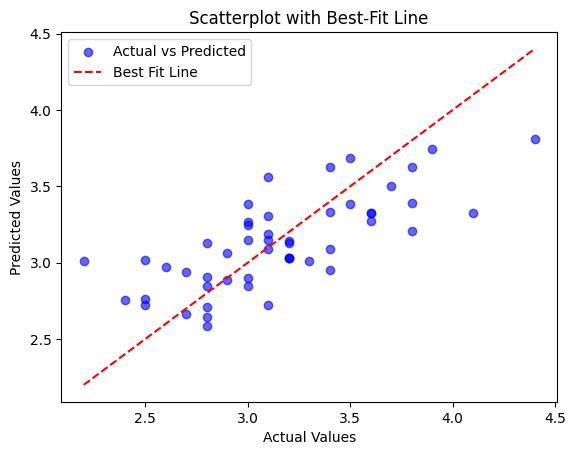

In [191]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Actual vs Predicted')

# Best-fit line (diagonal line for perfect predictions)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Best Fit Line')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatterplot with Best-Fit Line')
plt.legend()
plt.show()